## 여러 미분법과 다변수 함수의 도함수: 변화율과 도함수를 복잡한 함수로 확장하기

### 덧셈,뺄셈,곱셈,나눗셈의 미분법

**덧셈,뺄셈의 미분법**

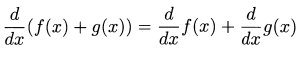

<br>

**곱셈의 미분법**

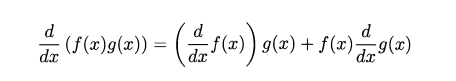

<br>

**나눗셈의 미분법**

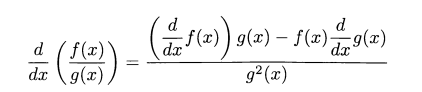


In [1]:
#미분하기 위한 라이브러리 호출
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#미분식
import math
from sympy import symbols, Limit    # pip install sympy

x, a, h = symbols('x, a, h')

fx = 3 * (x**2) - 4 * x + 1     # 함수 f(x) 정의
fxa = fx.subs({x: a})           # f(x)에 x = a 대입
fxh = fx.subs({x: a + h})       # f(x)에 x = a + h 대입

result = Limit( (fxh - fxa)/h, h, 0 ).doit()     # 극한값(미분계수) 계산

print(fx)
print(fxa)
print(fxh)

print("미분 Result:", result)


3*x**2 - 4*x + 1
3*a**2 - 4*a + 1
-4*a - 4*h + 3*(a + h)**2 + 1
미분 Result: 6*a - 4


### 합성함수의 미분법

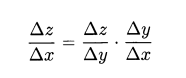

In [3]:
#라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict

#폰트설정
plt.rc('font', family = 'NanumGothic') #for windows
print(plt.rcParams['font.family'])

['NanumGothic']


#### 합성함수

In [4]:
np.set_printoptions(precision=4)

In [5]:
#합성함수
from typing import List

# ndarray를 인자로 받고 ndarray를 반환하는 함수
Array_Function = Callable[[ndarray], ndarray]

# Chain은 함수의 리스트다.
Chain = List[Array_Function]

In [6]:
def chain_length_2(chain: Chain, x:ndarray) ->ndarray:
    """
    두 함수를 연쇄적으로 평가
    """
    assert len(chain) ==2, \
    """
    인자 chain의 길이는 2
    """
    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))


#### 합성함수의 도함수

In [7]:
from typing import Callable

def deriv(func: Callable[[ndarray], ndarray],
          input_: ndarray,
          diff: float = 0.001) -> ndarray:
    '''
    배열 input의 각 요소에 대해 함수 func의 도함숫값 계산
    '''
    return (func(input_ + diff) - func(input_ - diff)) / (2 * diff)

In [8]:
def square(x: ndarray) -> ndarray:
    """
    인자로 받은 ndarray 배열의 각 요솟값을 제곱
    """
    return np.power(x,2)

def sigmoid(x: ndarray) -> ndarray:
    """
    입력으로 받은 ndarray의 각 요소에 대한 sigmoid 함숫값을 계산
    """
    return 1 / (1+np.exp(-x))

In [9]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    두 함수로 구성된 합성함수의 도함수를 계산하기 위해 연쇄법칙을 사용함
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "인자 chain의 길이는 2여야 함"

    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # 각 점끼리 값을 곱함
    return df1dx * df2du

In [10]:

def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    2개 이상의 ndarray -> ndarray 매핑으로 구성된 합성함수의
    그래프를 input_range 구간에 대해 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    
    assert input_range.ndim == 1, \
    "input_range는 1차원 ndarray여야 함"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)

In [11]:
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    연쇄법칙을 이용해 합성함수의 도함수를 계산하고 그래프를 작도함.
    
    ax: 작도에 사용할 matplotlib의 서브플롯
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc640' [U+c640], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub3c4' [U+b3c4], substituting with a dummy symbol.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
Font 'default' does not have a glyph for '\uc758' [U+c758], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud568' [U+d568], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc218' [U+c218], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc640' [U+c640], substituting with a dummy symbol

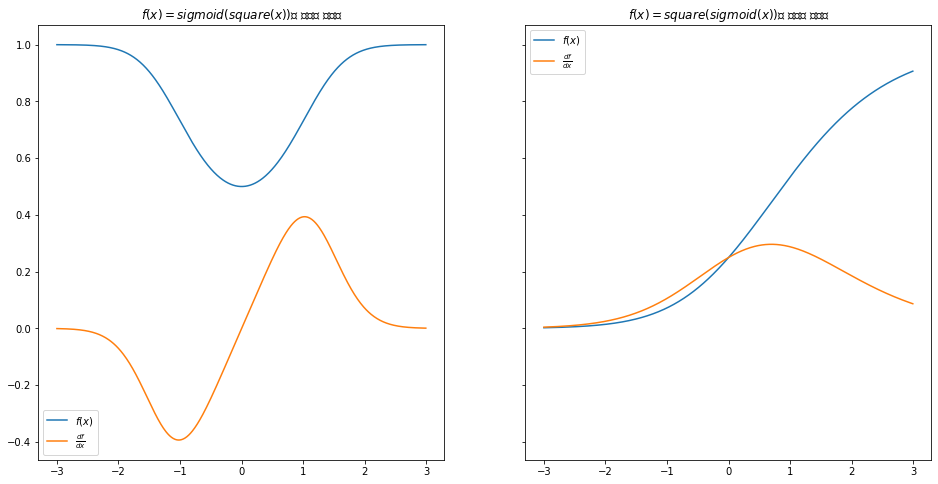

In [12]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("$f(x) = sigmoid(square(x))$의 함수와 도함수")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("$f(x) = square(sigmoid(x))$의 함수와 도함수");